In [116]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler,PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [73]:
df = pd.read_excel(r"C:\Users\Yagnesh Narola\Documents\Coding Languages\Artificial Intelligence\Excel_and_CSV\Data Train.xlsx")

In [74]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [75]:
df2 = df.copy()
le = LabelEncoder()
dtr = DecisionTreeRegressor()
scaler = StandardScaler()
model = LinearRegression()
model2 = LinearRegression()
rd = Ridge()
ls = Lasso()
poly = PolynomialFeatures(degree = 2)
rfr = RandomForestRegressor(n_estimators = 150)

In [76]:
df2 = df2.drop(columns = ['Route','Duration'])

In [77]:
df2.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Dep_Time           0
Arrival_Time       0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [78]:
df2['Additional_Info'] = df2['Additional_Info'].str.replace('No info', 'No Info')
df2['Additional_Info'] = df2['Additional_Info'].str.lower().str.strip()
print(df2['Additional_Info'].unique())

['no info' 'in-flight meal not included' 'no check-in baggage included'
 '1 short layover' '1 long layover' 'change airports' 'business class'
 'red-eye flight' '2 long layover']


In [79]:
df2['Date_of_Journey'] = pd.to_datetime(df2['Date_of_Journey'], format='%d/%m/%Y')

In [80]:
df2['month'] = df2['Date_of_Journey'].dt.month
df2['date'] = df2['Date_of_Journey'].dt.day
df2['year'] = df2['Date_of_Journey'].dt.year

In [81]:
df2 = df2.drop(columns = 'Date_of_Journey')

In [82]:
df2

,Airline,Source,Destination,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,month,date,year
0,IndiGo,Banglore,New Delhi,22:20,01:10 22 Mar,non-stop,no info,3897,3,24,2019
1,Air India,Kolkata,Banglore,05:50,13:15,2 stops,no info,7662,5,1,2019
2,Jet Airways,Delhi,Cochin,09:25,04:25 10 Jun,2 stops,no info,13882,6,9,2019
3,IndiGo,Kolkata,Banglore,18:05,23:30,1 stop,no info,6218,5,12,2019
4,IndiGo,Banglore,New Delhi,16:50,21:35,1 stop,no info,13302,3,1,2019
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,19:55,22:25,non-stop,no info,4107,4,9,2019
10679,Air India,Kolkata,Banglore,20:45,23:20,non-stop,no info,4145,4,27,2019
10680,Jet Airways,Banglore,Delhi,08:20,11:20,non-stop,no info,7229,4,27,2019
10681,Vistara,Banglore,New Delhi,11:30,14:10,non-stop,no info,12648,3,1,2019


In [83]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Dep_Time         10683 non-null  object
 4   Arrival_Time     10683 non-null  object
 5   Total_Stops      10682 non-null  object
 6   Additional_Info  10683 non-null  object
 7   Price            10683 non-null  int64 
 8   month            10683 non-null  int32 
 9   date             10683 non-null  int32 
 10  year             10683 non-null  int32 
dtypes: int32(3), int64(1), object(7)
memory usage: 793.0+ KB


In [84]:
df2['Dep_Time'] = pd.to_datetime(df2['Dep_Time'], format='%H:%M')
df2['Departure_Hour'] = df2['Dep_Time'].dt.hour
df2['Departure_Minute'] = df2['Dep_Time'].dt.minute

In [85]:
df2['Arrival_Time'] = df2['Arrival_Time'].str.split().apply(lambda x: x[0])
df2['Arrival_Time'] = pd.to_datetime(df2['Arrival_Time'], format='%H:%M')
df2['Arrival_Hour'] = df2['Arrival_Time'].dt.hour
df2['Arrival_Minute'] = df2['Arrival_Time'].dt.minute

In [86]:
df2.drop(columns=['Dep_Time', 'Arrival_Time'], inplace=True)

In [87]:
def DayTime(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'
df2['Dep_Day_Time'] = df2['Departure_Hour'].apply(DayTime)
df2['Arrival_Day_Time'] = df2['Arrival_Hour'].apply(DayTime)

In [88]:
df2

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,month,date,year,Departure_Hour,Departure_Minute,Arrival_Hour,Arrival_Minute,Dep_Day_Time,Arrival_Day_Time
0,IndiGo,Banglore,New Delhi,non-stop,no info,3897,3,24,2019,22,20,1,10,Night,Night
1,Air India,Kolkata,Banglore,2 stops,no info,7662,5,1,2019,5,50,13,15,Morning,Afternoon
2,Jet Airways,Delhi,Cochin,2 stops,no info,13882,6,9,2019,9,25,4,25,Morning,Night
3,IndiGo,Kolkata,Banglore,1 stop,no info,6218,5,12,2019,18,5,23,30,Evening,Night
4,IndiGo,Banglore,New Delhi,1 stop,no info,13302,3,1,2019,16,50,21,35,Afternoon,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,non-stop,no info,4107,4,9,2019,19,55,22,25,Evening,Night
10679,Air India,Kolkata,Banglore,non-stop,no info,4145,4,27,2019,20,45,23,20,Evening,Night
10680,Jet Airways,Banglore,Delhi,non-stop,no info,7229,4,27,2019,8,20,11,20,Morning,Morning
10681,Vistara,Banglore,New Delhi,non-stop,no info,12648,3,1,2019,11,30,14,10,Morning,Afternoon


In [89]:
objvar = df2.select_dtypes(include = 'object')
for i in objvar.columns:
    df2[i] = le.fit_transform(df2[i])

In [90]:
df2

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,month,date,year,Departure_Hour,Departure_Minute,Arrival_Hour,Arrival_Minute,Dep_Day_Time,Arrival_Day_Time
0,3,0,5,4,7,3897,3,24,2019,22,20,1,10,3,3
1,1,3,0,1,7,7662,5,1,2019,5,50,13,15,2,0
2,4,2,1,1,7,13882,6,9,2019,9,25,4,25,2,3
3,3,3,0,0,7,6218,5,12,2019,18,5,23,30,1,3
4,3,0,5,0,7,13302,3,1,2019,16,50,21,35,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,4,7,4107,4,9,2019,19,55,22,25,1,3
10679,1,3,0,4,7,4145,4,27,2019,20,45,23,20,1,3
10680,4,0,2,4,7,7229,4,27,2019,8,20,11,20,2,2
10681,10,0,5,4,7,12648,3,1,2019,11,30,14,10,2,0


In [91]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Airline           10683 non-null  int32
 1   Source            10683 non-null  int32
 2   Destination       10683 non-null  int32
 3   Total_Stops       10683 non-null  int32
 4   Additional_Info   10683 non-null  int32
 5   Price             10683 non-null  int64
 6   month             10683 non-null  int32
 7   date              10683 non-null  int32
 8   year              10683 non-null  int32
 9   Departure_Hour    10683 non-null  int32
 10  Departure_Minute  10683 non-null  int32
 11  Arrival_Hour      10683 non-null  int32
 12  Arrival_Minute    10683 non-null  int32
 13  Dep_Day_Time      10683 non-null  int32
 14  Arrival_Day_Time  10683 non-null  int32
dtypes: int32(14), int64(1)
memory usage: 667.8 KB


<Axes: ylabel='Price'>

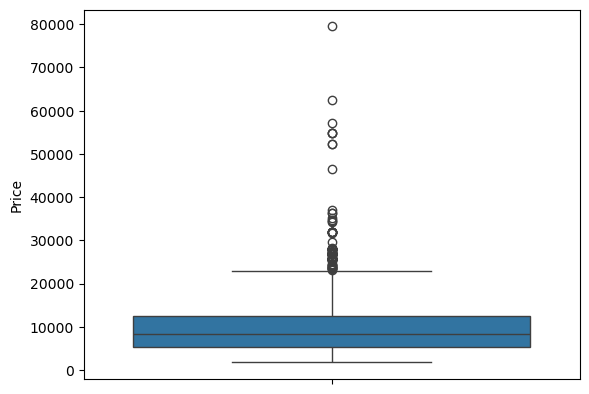

In [92]:
sns.boxplot(df2['Price'])

In [93]:
def Outliers(df,columns):
    q1 = df[columns].quantile(0.25)
    q3 = df[columns].quantile(0.75)
    iqr = q3 - q1
    upperlimit = q3 + (1.5 * iqr)
    lowerlimit = q1 - (1.5 * iqr)
    df.loc[(df[columns] > upperlimit),columns] = upperlimit
    df.loc[(df[columns] < lowerlimit),columns] = lowerlimit
    return df
cols = ['Price']
df2 = Outliers(df2,'Price')

In [94]:
df2.describe()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,month,date,year,Departure_Hour,Departure_Minute,Arrival_Hour,Arrival_Minute,Dep_Day_Time,Arrival_Day_Time
count,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.0,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000
mean,3.965927,1.952261,1.436113,1.458579,6.582140,9021.898156,4.708602,13.508378,2019.0,12.490686,24.411214,13.348778,24.690630,1.562857,1.704016
std,2.352155,1.177221,1.474782,1.806560,0.838073,4260.387144,1.164357,8.479277,0.0,5.748650,18.767980,6.859125,16.506036,0.940892,1.129596
min,0.000000,0.000000,0.000000,0.000000,0.000000,1759.000000,3.000000,1.000000,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,2.000000,0.000000,0.000000,7.000000,5277.000000,3.000000,6.000000,2019.0,8.000000,5.000000,8.000000,10.000000,1.000000,1.000000
50%,4.000000,2.000000,1.000000,0.000000,7.000000,8372.000000,5.000000,12.000000,2019.0,11.000000,25.000000,14.000000,25.000000,2.000000,2.000000
75%,4.000000,3.000000,2.000000,4.000000,7.000000,12373.000000,6.000000,21.000000,2019.0,18.000000,40.000000,19.000000,35.000000,2.000000,3.000000
max,11.000000,4.000000,5.000000,5.000000,8.000000,23017.000000,6.000000,27.000000,2019.0,23.000000,55.000000,23.000000,55.000000,3.000000,3.000000


In [95]:
df2.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Price', 'month', 'date', 'year', 'Departure_Hour', 'Departure_Minute',
       'Arrival_Hour', 'Arrival_Minute', 'Dep_Day_Time', 'Arrival_Day_Time'],
      dtype='object')

In [96]:
df2['Departure_Time'] = df2['Departure_Hour'] * 60 + df2['Departure_Minute']
df2['Departure_Time'] = df2['Arrival_Hour'] * 60 + df2['Arrival_Minute']
# df2['Journey_Date'] = pd.to_datetime(df2[['year', 'month', 'date']].rename(columns={
#     'year': 'year',
#     'month': 'month',
#     'date': 'day'
# }))

In [97]:
df2.isnull().sum()

Airline             0
Source              0
Destination         0
Total_Stops         0
Additional_Info     0
Price               0
month               0
date                0
year                0
Departure_Hour      0
Departure_Minute    0
Arrival_Hour        0
Arrival_Minute      0
Dep_Day_Time        0
Arrival_Day_Time    0
Departure_Time      0
dtype: int64

In [98]:
df2 = df2.drop(columns=['year', 'month', 'date','Arrival_Hour','Arrival_Minute','Departure_Hour','Departure_Minute'])

In [99]:
df2

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Dep_Day_Time,Arrival_Day_Time,Departure_Time
0,3,0,5,4,7,3897,3,3,70
1,1,3,0,1,7,7662,2,0,795
2,4,2,1,1,7,13882,2,3,265
3,3,3,0,0,7,6218,1,3,1410
4,3,0,5,0,7,13302,0,3,1295
...,...,...,...,...,...,...,...,...,...
10678,0,3,0,4,7,4107,1,3,1345
10679,1,3,0,4,7,4145,1,3,1400
10680,4,0,2,4,7,7229,2,2,680
10681,10,0,5,4,7,12648,2,0,850


In [100]:
x = df2.drop(columns = 'Price')
y = df2['Price']

In [101]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,random_state = 70,test_size = 0.3)

In [102]:
scaler.fit(xtrain)
xtrainscaled = scaler.transform(xtrain)
xtestscaled = scaler.transform(xtest)
model.fit(xtrainscaled,ytrain)
linears = model.score(xtestscaled,ytest)

In [103]:
poly.fit(xtrain)
xtrainpoly = poly.transform(xtrain)
xtestpoly = poly.transform(xtest)
model2.fit(xtrainpoly,ytrain)
polys = model2.score(xtestpoly,ytest)

In [104]:
dtr.fit(xtrainscaled,ytrain)
dtrs = dtr.score(xtestscaled,ytest)

In [105]:
rd.fit(xtrainscaled,ytrain)
ridge = rd.score(xtestscaled,ytest)

In [106]:
ls.fit(xtrainscaled,ytrain)
lasso = ls.score(xtestscaled,ytest)

In [107]:
rfr.fit(xtrainscaled,ytrain)
rfrs = rfr.score(xtestscaled,ytest)

In [108]:
print("Regression Score:")
print("Linear Regression:",linears)
print("Lasso Regression:",lasso)
print("Decision Tree Regressor:",dtrs)
print("Ridge Regression:",ridge)
print("Polynomial Feature Regression:",polys)
print("Random Forest Regressor:",rfrs)

Regression Score:
Linear Regression: 0.38697325047264086
Lasso Regression: 0.38699815642150814
Decision Tree Regressor: 0.738843245006769
Ridge Regression: 0.3869780945657517
Polynomial Feature Regression: 0.5551409240880583
Random Forest Regressor: 0.7636309349509516


In [109]:
with open('model.pkl', 'wb') as f:
    pk.dump(rfrs, f)  
    
with open('scaler.pkl', 'wb') as f:
    pk.dump(scaler, f)

In [110]:
df2.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Price', 'Dep_Day_Time', 'Arrival_Day_Time', 'Departure_Time'],
      dtype='object')

In [111]:
df2['Dep_Day_Time'].unique()

array([3, 2, 1, 0])

In [112]:
AirlineLE = LabelEncoder()
SourceLE = LabelEncoder()
DestinationLE = LabelEncoder()
Dep_Day_TimeLE = LabelEncoder()
Arrival_Day_timeLE = LabelEncoder()
Additional_InfoLE = LabelEncoder()

In [113]:
xtrain['Airline'] = AirlineLE.fit_transform(xtrain['Airline'])
xtrain['Source'] = SourceLE.fit_transform(xtrain['Source'])
xtrain['Destination'] = DestinationLE.fit_transform(xtrain['Destination'])
xtrain['Dep_Day_Time'] = Dep_Day_TimeLE.fit_transform(xtrain['Dep_Day_Time'])
xtrain['Arrival_Day_Time'] = Arrival_Day_timeLE.fit_transform(xtrain['Arrival_Day_Time'])
xtrain['Additional_Info'] = Additional_InfoLE.fit_transform(xtrain['Additional_Info'])
xtrain[['Total_Stops', 'Departure_Time']] = scaler.fit_transform(xtrain[['Total_Stops', 'Departure_Time']])

In [119]:
from joblib import dump, load

with open("Flight_Price_Prediction_model_and_Scaler.joblib", "wb") as f:
    dump({
        'model': rfr,
        'AirlineLE': AirlineLE,
        'SourceLE': SourceLE,
        'DestinationLE': DestinationLE,
        'Dep_Day_TimeLE': Dep_Day_TimeLE,
        'Arrival_Day_TimeLE': Arrival_Day_timeLE,
        'Additional_InfoLE': Additional_InfoLE,
        'scaler': scaler
    }, f)